In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [3]:
import os, shutil

original_dataset_dir = os.path.join(os.path.expanduser('~'), 'Downloads', 'all', 'train')

base_dir = os.path.join(os.path.expanduser('~'), 'Downloads', 'all', 'cats_and_dogs_small')
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
model = models.Sequential()

In [5]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [7]:
model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 51s 505ms/step - loss: 0.6915 - acc: 0.5155 - val_loss: 0.6731 - val_acc: 0.5880
Epoch 2/30
100/100 [==============================] - 17s 172ms/step - loss: 0.6591 - acc: 0.6125 - val_loss: 0.6578 - val_acc: 0.5900
Epoch 3/30
100/100 [==============================] - 17s 173ms/step - loss: 0.6148 - acc: 0.6570 - val_loss: 0.6342 - val_acc: 0.6360
Epoch 4/30
100/100 [==============================] - 18s 176ms/step - loss: 0.5666 - acc: 0.7055 - val_loss: 0.6075 - val_acc: 0.6580
Epoch 5/30
100/100 [==============================] - 17s 174ms/step - loss: 0.5265 - acc: 0.7385 - val_loss: 0.6111 - val_acc: 0.6690
Epoch 6/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4983 - acc: 0.7645 - val_loss: 0.5687 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 17s 174ms/step - loss: 0.4731 - acc: 0.7770 - val_loss: 0.5575 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 1

In [11]:
model.save('cats_dogs_small_1.h5')

In [12]:
import matplotlib.pyplot as plt

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

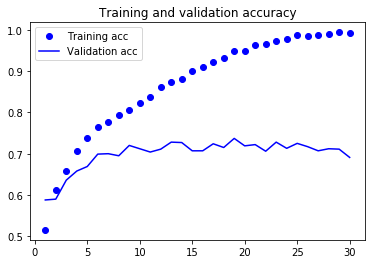

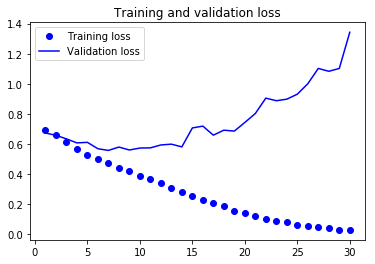

In [14]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Using Data Augmentation
Data augmentation takes the approach of generating more training data
from existing training samples, by augmenting the samples via a number of random
transformations that yield believable-looking images

###  Setting up a data augmentation configuration via ImageDataGenerator

In [15]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [16]:
from tensorflow.keras.preprocessing import image

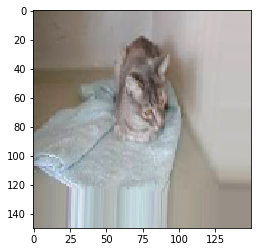

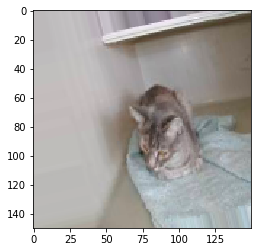

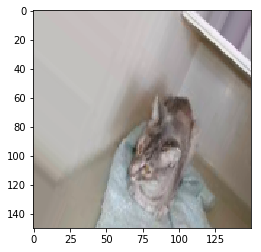

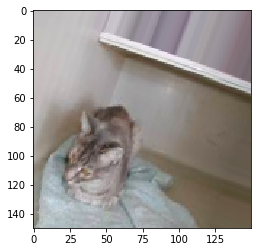

In [17]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[4]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()


## Defining new model with Dropout

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 40s 400ms/step - loss: 0.6915 - acc: 0.5075 - val_loss: 0.6753 - val_acc: 0.5850
Epoch 2/100
100/100 [==============================] - 36s 359ms/step - loss: 0.6689 - acc: 0.5869 - val_loss: 0.6699 - val_acc: 0.5761
Epoch 3/100
100/100 [==============================] - 36s 364ms/step - loss: 0.6563 - acc: 0.6000 - val_loss: 0.6391 - val_acc: 0.6180
Epoch 4/100
100/100 [==============================] - 37s 371ms/step - loss: 0.6310 - acc: 0.6391 - val_loss: 0.6495 - val_acc: 0.5869
Epoch 5/100
100/100 [==============================] - 36s 359ms/step - loss: 0.6159 - acc: 0.6453 - val_loss: 0.7002 - val_acc: 0.5463
Epoch 6/100
100/100 [==============================] - 39s 388ms/step - loss: 0.6145 - acc: 0.6597 - val_loss: 0.5857 - val_acc: 0.6739
Epoch 7/100
100/100 [==============================] - 37s 368ms/step - loss: 0.5912 - acc: 0.6763 -

100/100 [==============================] - 36s 359ms/step - loss: 0.4200 - acc: 0.8128 - val_loss: 0.4574 - val_acc: 0.7830
Epoch 61/100
100/100 [==============================] - 37s 367ms/step - loss: 0.4155 - acc: 0.8125 - val_loss: 0.4377 - val_acc: 0.8052
Epoch 62/100
100/100 [==============================] - 38s 376ms/step - loss: 0.4014 - acc: 0.8194 - val_loss: 0.4693 - val_acc: 0.7906
Epoch 63/100
100/100 [==============================] - 36s 364ms/step - loss: 0.4058 - acc: 0.8169 - val_loss: 0.4980 - val_acc: 0.7976
Epoch 64/100
100/100 [==============================] - 36s 362ms/step - loss: 0.3981 - acc: 0.8156 - val_loss: 0.4747 - val_acc: 0.7919
Epoch 65/100
100/100 [==============================] - 36s 364ms/step - loss: 0.4086 - acc: 0.8169 - val_loss: 0.4529 - val_acc: 0.7881
Epoch 66/100
100/100 [==============================] - 36s 365ms/step - loss: 0.3941 - acc: 0.8153 - val_loss: 0.5054 - val_acc: 0.7690
Epoch 67/100
100/100 [==============================] 

In [20]:
model.save('cats_dogs_small_2.h5')

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

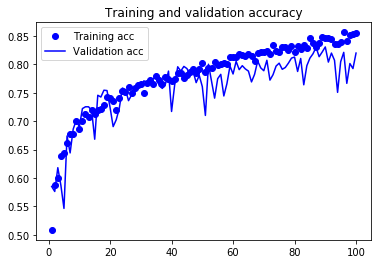

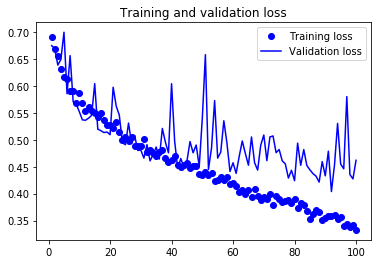

In [22]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()